### Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('heart.csv')

### EDA

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
# Checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

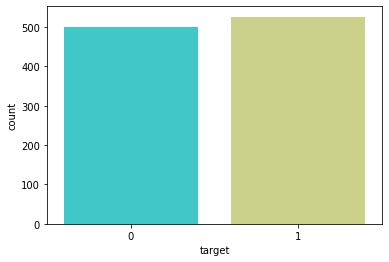

In [9]:
sns.countplot(x='target',data=df,palette='rainbow')
# We can see a well balanced dataset here

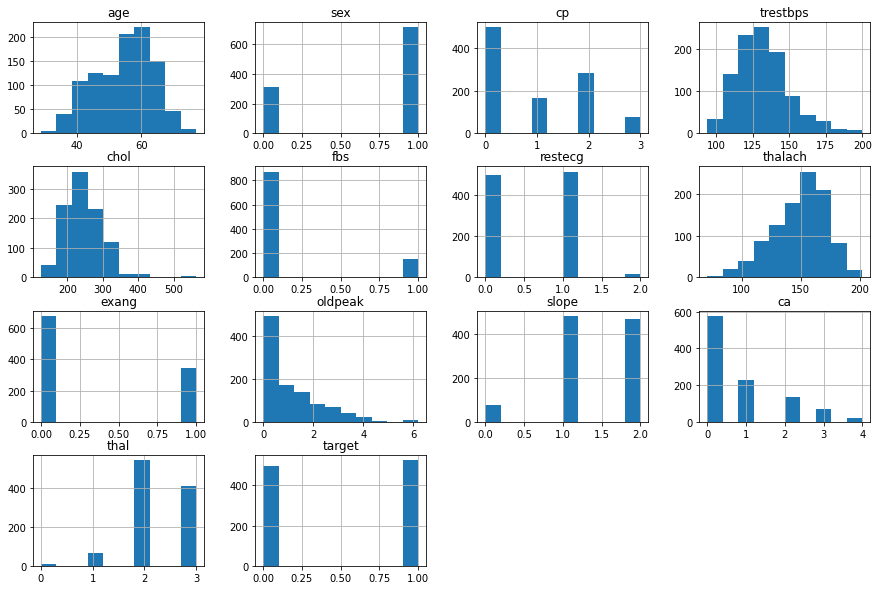

In [10]:
df.hist()
his=plt.gcf()
his.set_size_inches(15,10)
plt.show()

<AxesSubplot:>

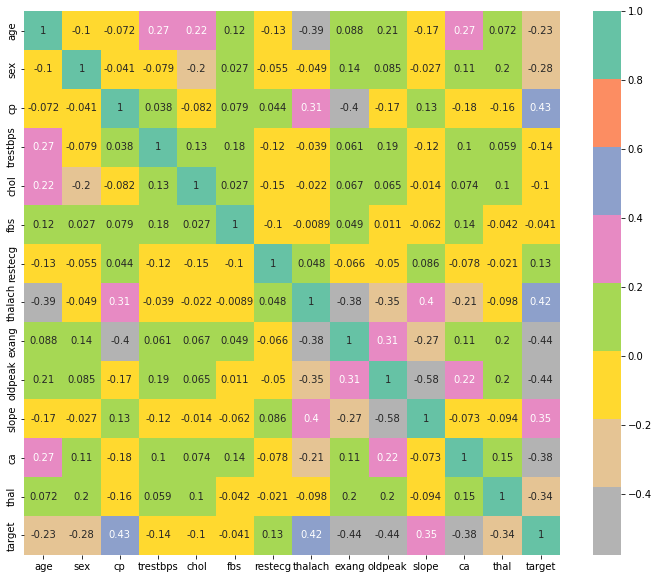

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='Set2_r')

### Separating dependent and independent variables

In [12]:
X=df.drop('target',axis=1)
y=df.target

### Train test split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Fitting Neural Network

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model=Sequential([
    tf.keras.Input(shape=(13,)),
    Dense(units=25,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(units=1,activation='sigmoid')
])

In [17]:
model.compile(
loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [18]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
26/26 [==============================] - 1s 2ms/step - loss: 0.4871 - accuracy: 0.7646
Epoch 2/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8683
Epoch 3/50
26/26 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.8854
Epoch 4/50
26/26 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.9122
Epoch 5/50
26/26 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9195
Epoch 6/50
26/26 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.9341
Epoch 7/50
26/26 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9378
Epoch 8/50
26/26 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9537
Epoch 9/50
26/26 [==============================] - 0s 2ms/step - loss: 0.1111 - accuracy: 0.9683
Epoch 10/50
26/26 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 0.9744
Epoch 11/50
26/26 [

In [19]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9854


[0.17602631449699402, 0.9853658676147461]

In [20]:
y_hat=model.predict(X_test)

In [21]:
l1=[]

for i in y_hat:
    if i>0.5:
        l1.append(1)
    else:
        l1.append(0)

In [22]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix


In [23]:
accuracy_score(l1,y_test)

0.9853658536585366

In [24]:
f1_score(y_test,l1)

0.9852216748768473

<AxesSubplot:>

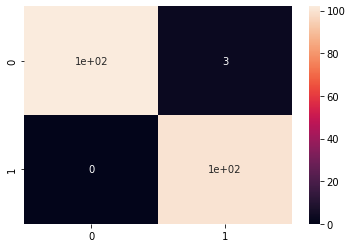

In [25]:
sns.heatmap(confusion_matrix(l1,y_test),annot=True)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,l1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

